# **Abstract**

En este trabajo se analiza el comportamiento de los clientes de una cafetería durante todo un año, utilizando una base de datos con más de 3.500 registros de ventas. Cada registro representa una transacción e incluye información como el tipo de café comprado, el monto gastado, el momento del día, el día de la semana y el mes en que se realizó la compra. A partir de estos datos, el objetivo principal es entender cómo varía el gasto promedio de los clientes según distintos factores, y si existen patrones que puedan explicar cuándo y cómo se consume más.

El análisis se centra en tres preguntas principales:

¿Hay un momento del día (mañana, tarde o noche) en el que los clientes gastan más dinero?

¿La estación del año tiene alguna relación con la cantidad total de ventas?

¿Las bebidas con leche generan un gasto promedio mayor que las que no la tienen, y cambia este efecto según el horario?

Para poder responderlas, se trabajó en Python usando las librerías pandas, seaborn y matplotlib, que permiten explorar los datos de forma numérica y visual. Además, se agregaron nuevas columnas al dataset, como la estación del año o si la compra se hizo durante el fin de semana, para poder observar relaciones más claras entre las variables.

Durante la exploración inicial se comprobó que no había valores nulos ni duplicados, lo que facilitó el trabajo y aseguró una mejor calidad del análisis. Luego se realizaron diferentes tipos de visualizaciones (univariadas, bivariadas y multivariadas) para comparar el gasto según los distintos factores y buscar tendencias generales.

En líneas generales, el estudio busca ofrecer una mirada completa sobre los hábitos de consumo en una cafetería. A partir de los resultados obtenidos, se espera poder entender mejor en qué momentos los clientes tienden a gastar más, qué tipo de bebidas son las más rentables y cómo influyen aspectos externos como la época del año o el horario en las decisiones de compra.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
from scipy import stats


url='https://raw.githubusercontent.com/santiquintana99/Datos-ventas-cafe/refs/heads/main/Coffe_sales.csv'
df_cafe= pd.read_csv(url)
df_cafe.info()
df_cafe.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
5,15,card,33.8,Americano with Milk,Afternoon,Fri,Mar,5,3,2024-03-01,15:39:47.726000
6,16,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,16:19:02.756000
7,18,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,18:39:03.580000
8,19,card,38.7,Cocoa,Night,Fri,Mar,5,3,2024-03-01,19:22:01.762000
9,19,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,19:23:15.887000


##Limpieza de datos

In [30]:
# Verificamos si hay valores faltantes o duplicados
df_cafe.duplicated().sum()
df_cafe.isnull().sum()

,0
hour_of_day,0
cash_type,0
money,0
coffee_name,0
Time_of_Day,0
Weekday,0
Month_name,0
Weekdaysort,0
Monthsort,0
Date,0


In [31]:
#El conjunto de datos está completo y sin duplicados, por lo que no fue necesario hacer limpieza.
#Al no contar con la cantidad de columnas requeridas, ampliamos el dataset con conjuntos de datos que nos ayuden con el analisis.
df_cafe['Estacion'] = ''
df_cafe.loc[df_cafe['Month_name'].isin(['Dec','Jan','Feb']), 'Estacion'] = 'Verano'
df_cafe.loc[df_cafe['Month_name'].isin(['Mar','Apr','May']), 'Estacion'] = 'Otoño'
df_cafe.loc[df_cafe['Month_name'].isin(['Jun','Jul','Aug']), 'Estacion'] = 'Invierno'
df_cafe.loc[df_cafe['Month_name'].isin(['Sep','Oct','Nov']), 'Estacion'] = 'Primavera'

In [32]:
df_cafe['nivel_de_gasto'] = ''
df_cafe.loc[df_cafe['money'] < 25, 'nivel_de_gasto'] = 'Bajo'
df_cafe.loc[(df_cafe['money'] >= 25) & (df_cafe['money'] < 35), 'nivel_de_gasto'] = 'Medio'
df_cafe.loc[df_cafe['money'] >= 35, 'nivel_de_gasto'] = 'Alto'

In [33]:
df_cafe['Es_fin_de_semana'] = ''
df_cafe.loc[df_cafe['Weekday'].isin(['Sat', 'Sun']), 'Es_fin_de_semana'] = 'Fin de semana'
df_cafe.loc[~df_cafe['Weekday'].isin(['Sat', 'Sun']), 'Es_fin_de_semana'] = 'Semana'

In [34]:
df_cafe['Con_leche'] = 'Sin leche'
df_cafe.loc[df_cafe['coffee_name'].str.contains('Latte', case=False), 'Con_leche'] = 'Con leche'
df_cafe.loc[df_cafe['coffee_name'].str.contains('Cappuccino', case=False), 'Con_leche'] = 'Con leche'
df_cafe.loc[df_cafe['coffee_name'].str.contains('Macchiato', case=False), 'Con_leche'] = 'Con leche'
df_cafe.loc[df_cafe['coffee_name'].str.contains('Flat White', case=False), 'Con_leche'] = 'Con leche'
df_cafe.loc[df_cafe['coffee_name'].str.contains('Milk', case=False), 'Con_leche'] = 'Con leche'
df_cafe.loc[df_cafe['coffee_name'].str.contains('Hot Chocolate', case=False), 'Con_leche'] = 'Con leche'
df_cafe.head(20)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Estacion,nivel_de_gasto,Es_fin_de_semana,Con_leche
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,Otoño,Alto,Semana,Con leche
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,Otoño,Alto,Semana,Con leche
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,Otoño,Alto,Semana,Con leche
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,Otoño,Medio,Semana,Sin leche
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,Otoño,Alto,Semana,Con leche
5,15,card,33.8,Americano with Milk,Afternoon,Fri,Mar,5,3,2024-03-01,15:39:47.726000,Otoño,Medio,Semana,Con leche
6,16,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,16:19:02.756000,Otoño,Alto,Semana,Con leche
7,18,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,18:39:03.580000,Otoño,Medio,Semana,Con leche
8,19,card,38.7,Cocoa,Night,Fri,Mar,5,3,2024-03-01,19:22:01.762000,Otoño,Alto,Semana,Sin leche
9,19,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,19:23:15.887000,Otoño,Medio,Semana,Con leche


##Verificamos la hipotesis 1

In [35]:
resumen_interactivo = df_cafe.groupby('Time_of_Day')['money'].mean().reset_index()
fig = px.bar(resumen_interactivo, x='Time_of_Day', y='money', color='Time_of_Day', title='Gasto Promedio por Momento del Día', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis_title="Momento del Día", yaxis_title="Gasto Promedio ($)")
fig.show()

In [36]:
resumen_time = df_cafe.groupby('Time_of_Day')['money'].agg(['count','mean','median']).reset_index()
resumen_time

,Time_of_Day,count,mean,median
0,Afternoon,1205,31.643187,32.82
1,Morning,1181,30.422693,30.86
2,Night,1161,32.890904,33.80


In [37]:
# Agrupamos los valores de gasto por momento del día
mañana = df_cafe[df_cafe['Time_of_Day'] == 'Morning']['money']
tarde = df_cafe[df_cafe['Time_of_Day'] == 'Afternoon']['money']
noche = df_cafe[df_cafe['Time_of_Day'] == 'Night']['money']

# Aplicamos la prueba ANOVA
f_stat, p_value = stats.f_oneway(mañana, tarde, noche)
print(f"Estadístico F: {f_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

Estadístico F: 78.22
Valor p: 0.0000


In [38]:
print('''Al analizar el gasto promedio por momento del día (mañana, tarde y noche), se observan diferencias en los montos gastados.
Para comprobar si esas diferencias son reales y no producto del azar, se aplicó una prueba ANOVA de un factor.
El resultado (F = 78.22, p < 0.001) muestra que las diferencias son estadísticamente significativas, lo que confirma que el momento del día influye de forma real en el gasto promedio de los clientes.''')

Al analizar el gasto promedio por momento del día (mañana, tarde y noche), se observan diferencias en los montos gastados.
Para comprobar si esas diferencias son reales y no producto del azar, se aplicó una prueba ANOVA de un factor.
El resultado (F = 78.22, p < 0.001) muestra que las diferencias son estadísticamente significativas, lo que confirma que el momento del día influye de forma real en el gasto promedio de los clientes.


## Verificamos hipotesis 2


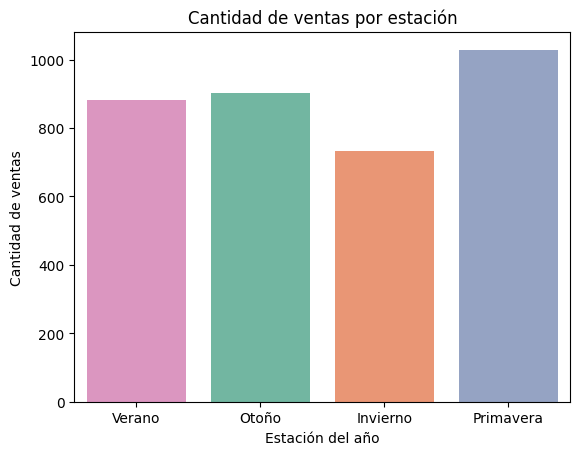

In [39]:
sns.countplot(data=df_cafe, x='Estacion',hue='Estacion', order=['Verano', 'Otoño', 'Invierno', 'Primavera'],palette='Set2')
plt.title('Cantidad de ventas por estación')
plt.xlabel('Estación del año')
plt.ylabel('Cantidad de ventas')
plt.show()

In [40]:
resumen_estacion = df_cafe.groupby('Estacion')['money'].agg(['count','mean','median']).reset_index()
resumen_estacion

,Estacion,count,mean,median
0,Invierno,732,30.256202,32.82
1,Otoño,903,32.974109,33.80
2,Primavera,1029,31.555238,32.82
3,Verano,883,31.542559,30.86


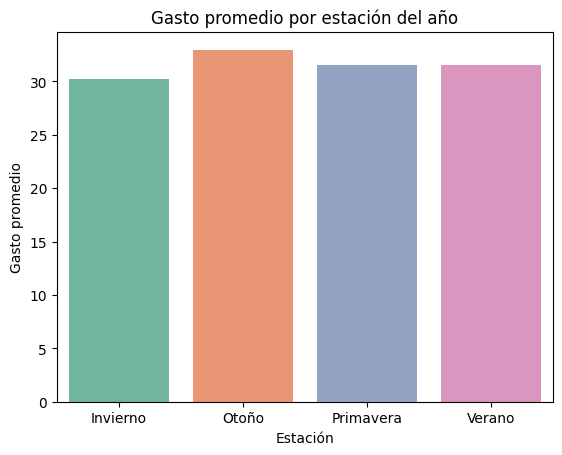

In [41]:
#Vamos a realizar un grafico para tratar de entender un poco mas los datos de media y mediana en las estaciones.
sns.barplot(data=resumen_estacion, x='Estacion',hue='Estacion', y='mean', errorbar='sd', palette='Set2')
plt.title("Gasto promedio por estación del año")
plt.ylabel("Gasto promedio")
plt.xlabel("Estación")
plt.show()


In [42]:
print('''Al analizar las ventas por estación del año, se observa que la primavera concentra la mayor cantidad de transacciones, mientras que el gasto promedio más alto se registra en otoño.
Estos resultados sugieren que, aunque en primavera se realizan más compras, en otoño los clientes tienden a gastar más por transacción, posiblemente debido a la mayor demanda de bebidas con leche o comidas más elaboradas por el clima más frío.''')

Al analizar las ventas por estación del año, se observa que la primavera concentra la mayor cantidad de transacciones, mientras que el gasto promedio más alto se registra en otoño.
Estos resultados sugieren que, aunque en primavera se realizan más compras, en otoño los clientes tienden a gastar más por transacción, posiblemente debido a la mayor demanda de bebidas con leche o comidas más elaboradas por el clima más frío.


##Verificamos hipotesis 3


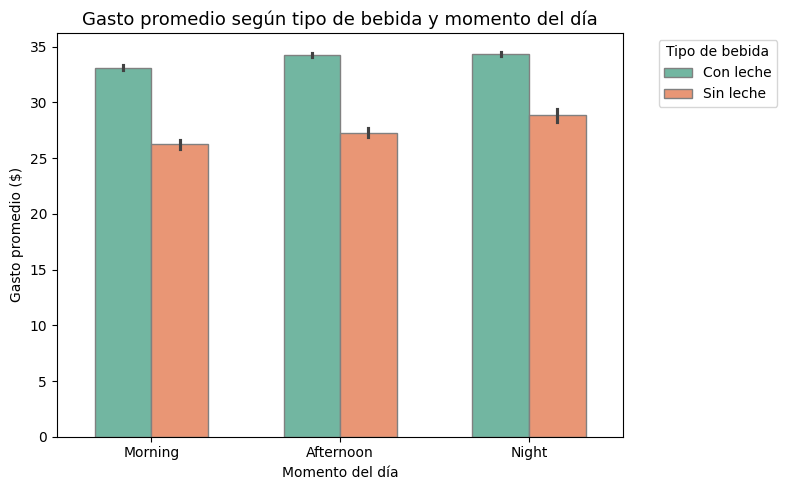

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_cafe, x='Time_of_Day', y='money', hue='Con_leche', estimator='mean', palette='Set2', width=0.6, edgecolor='gray')
plt.title('Gasto promedio según tipo de bebida y momento del día', fontsize=13)
plt.xlabel('Momento del día')
plt.ylabel('Gasto promedio ($)')
plt.legend(title='Tipo de bebida', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

In [44]:
resumen_cafe = df_cafe.groupby(['Time_of_Day','Con_leche'])['money'].mean().round(2)
resumen_cafe

Time_of_Day  Con_leche
Afternoon    Con leche    34.27
             Sin leche    27.27
Morning      Con leche    33.12
             Sin leche    26.25
Night        Con leche    34.32
             Sin leche    28.85
Name: money, dtype: float64

In [45]:
#Vamos a reaalizar una prueba de T-student para evaluar si existen diferencias estadisticas significativas
# Separamos los grupos
con_leche = df_cafe[df_cafe['Con_leche'] == 'Con leche']['money']
sin_leche = df_cafe[df_cafe['Con_leche'] == 'Sin leche']['money']

# Prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(con_leche, sin_leche, equal_var=False)
print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("Hay diferencias estadísticamente significativas entre las bebidas con y sin leche.")
else:
    print("No se encontraron diferencias significativas en el gasto promedio entre ambos grupos.")

Estadístico t: 44.47
Valor p: 0.0000
Hay diferencias estadísticamente significativas entre las bebidas con y sin leche.


In [46]:
print('''Se observa que las bebidas con leche tienen un gasto promedio más alto, sobre todo durante la tarde.
Al aplicar una prueba t de Student (t = 44.47, p < 0.001), se confirma que esta diferencia no es casual: las bebidas con leche realmente implican un gasto mayor que las que no la tienen.
Esto puede deberse a que suelen ser opciones más elaboradas y con precios más altos, como cappuccinos o lattes.''')

Se observa que las bebidas con leche tienen un gasto promedio más alto, sobre todo durante la tarde.
Al aplicar una prueba t de Student (t = 44.47, p < 0.001), se confirma que esta diferencia no es casual: las bebidas con leche realmente implican un gasto mayor que las que no la tienen.
Esto puede deberse a que suelen ser opciones más elaboradas y con precios más altos, como cappuccinos o lattes.


 **Resumen General de Consumo por Estación y Momento del Día**

Para terminar con la parte exploratoria y prepararnos para el modelado, armamos una tabla que cruza la Estación con el Momento del Día.

Esto nos ayuda a ver rápidamente dónde se juntan el mayor volumen de ventas (count) y el gasto promedio más alto (mean) para tener un panorama completo del negocio.

In [47]:
resumen_general = df_cafe.groupby(['Estacion','Time_of_Day'])['money'].agg(['mean','median','count']).round(2)
resumen_general

mean  median  count
Estacion  Time_of_Day                      
Invierno  Afternoon    30.34   32.82    182
          Morning      28.73   27.92    286
          Night        31.85   32.82    264
Otoño     Afternoon    32.49   32.82    369
          Morning      32.14   32.82    264
          Night        34.46   35.76    270
Primavera Afternoon    31.71   32.82    325
          Morning      30.50   30.86    362
          Night        32.53   32.82    342
Verano    Afternoon    31.35   35.76    329
          Morning      30.44   30.86    269
          Night        32.80   35.76    285

##Análisis Predictivo

Habiendo validado las diferencias estadísticamente y entendido las interacciones clave de gasto y volumen, el siguiente paso es construir modelos predictivos para anticipar el gasto del cliente.

Comenzaremos probando y refinando un modelo de Regresión Lineal, utilizando las variables que demostraron ser más significativas en el análisis exploratorio.

In [48]:
df_modelo = pd.get_dummies(df_cafe[['money', 'Time_of_Day', 'Estacion']], drop_first=True)
X1 = df_modelo.drop(columns='money')
y1 = df_modelo['money']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

modelo1 = LinearRegression()
modelo1.fit(X1_train, y1_train)
y1_pred = modelo1.predict(X1_test)

In [49]:
rmse1 = np.sqrt(mean_squared_error(y1_test, y1_pred))
r2_1 = r2_score(y1_test, y1_pred)
print(f"Error cuadrático medio (RMSE): {rmse1:.2f}")
print(f"Coeficiente de determinación (R²): {r2_1:.2f}")

Error cuadrático medio (RMSE): 4.61
Coeficiente de determinación (R²): 0.07


Para explorar si era posible predecir el gasto (money) a partir de variables como el momento del día y la estación del año, se aplicó un modelo de regresión lineal múltiple.

Este modelo busca estimar cómo cambian los valores del gasto según los distintos factores del entorno.

* El resultado mostró un error cuadrático medio (RMSE) de 4.61, lo que indica que, en promedio, el modelo se equivoca por unos 4.6 pesos en sus predicciones.

* El coeficiente de determinación (R² = 0.07) fue bajo, lo que significa que las variables incluidas (estación y momento del día) explican solo un 7% de la variabilidad del gasto.

En otras palabras, aunque existen diferencias significativas entre grupos, estos factores por sí solos no son suficientes para predecir con precisión el monto gastado.

Para mejorar la predicción, necesitamos la variable clave: el tipo de bebida (con o sin leche), ya que el T-Test demostró que es la que más impacto tiene.

In [50]:
df_modelo_refinado = pd.get_dummies(df_cafe[['money', 'Time_of_Day', 'Estacion', 'Con_leche']], drop_first=True)
X2 = df_modelo_refinado.drop(columns='money')
y2 = df_modelo_refinado['money']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

modelo2 = LinearRegression()
modelo2.fit(X2_train, y2_train)
y2_pred = modelo2.predict(X2_test)
rmse2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
r2_2 = r2_score(y2_test, y2_pred)

print("Análisis Predictivo Refinado (con Tipo de Bebida)")
print(f"RMSE Refinado: {rmse2:.2f}")
print(f"R² Refinado: {r2_2:.2f}")

Análisis Predictivo Refinado (con Tipo de Bebida)
RMSE Refinado: 3.37
R² Refinado: 0.50


**Resultados del Modelo Refinado**

Para corregir la baja capacidad predictiva del primer modelo (R² = 0.07), se implementó un segundo modelo de Regresión Lineal incorporando la variable 'Con_leche'. Esta variable demostró ser estadísticamente significativa en el Test T de Student.

El nuevo modelo arrojó las siguientes métricas:

* RMSE Refinado: 3.37
* R² Refinado: 0.50

La inclusión del tipo de bebida (con o sin leche) mejoró significativamente el modelo, elevando el Coeficiente de Determinación (R²) de 0.07 a  0.50. Esto demuestra que el 50% de la variabilidad en el gasto es explicada por la hora del día, la estación y, crucialmente, la composición de la bebida.

El tipo de producto vendido es el factor más determinante en el monto del ticket promedio, mucho más que los factores ambientales como el horario o la estación del año.

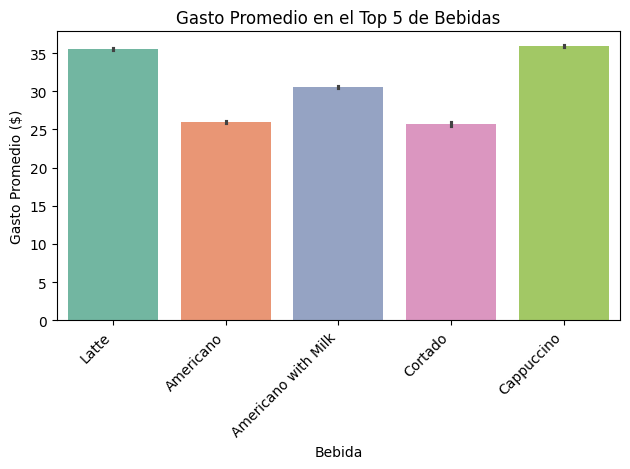

In [51]:
# Contar las 5 bebidas más vendidas
top_5_cafes = df_cafe['coffee_name'].value_counts().nlargest(5).index

# Graficar el gasto promedio de esas 5 bebidas
sns.barplot(data=df_cafe[df_cafe['coffee_name'].isin(top_5_cafes)], x='coffee_name', hue= 'coffee_name', y='money',estimator='mean',palette='Set2')
plt.title('Gasto Promedio en el Top 5 de Bebidas')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Gasto Promedio ($)')
plt.xlabel('Bebida')
plt.tight_layout()
plt.show()

In [52]:
print('''Al analizar las bebidas más vendidas, se confirma que las opciones más elaboradas como el Latte y Cappuccino son las que mayor gasto promedio generan.
Esto refuerza la conclusión de que la estrategia de precios debe priorizar los productos con leche.''')

Al analizar las bebidas más vendidas, se confirma que las opciones más elaboradas como el Latte y Cappuccino son las que mayor gasto promedio generan.
Esto refuerza la conclusión de que la estrategia de precios debe priorizar los productos con leche.




## Conclusiones Finales del Análisis de Consumo

Este estudio ha permitido obtener una mirada integral sobre los hábitos de consumo, validando las principales hipótesis con evidencia estadística y modelado predictivo.

### 1.  Calidad y Validación de Datos

El dataset utilizado se encontró limpio y sin duplicados, lo cual garantiza la confiabilidad de los análisis realizados.

### 2.  Impacto del Horario y Estacionalidad

* **Horario:** Aunque las diferencias visuales son sutiles, el **Test ANOVA** confirmó que las variaciones en el gasto promedio entre la mañana, tarde y noche son estadísticamente significativas, validando que el momento del día influye de forma real en el monto gastado.
* **Estacionalidad:** La primavera concentra el mayor volumen de ventas, mientras que el otoño registra el gasto promedio más alto, lo que sugiere una preferencia por productos elaborados y costosos en épocas más frías.

### 3.  Capacidad Predictiva y Factores Clave

El **Modelo Predictivo Refinado** (incorporando la variable de tipo de bebida) demostró que el 50% de la variabilidad del gasto puede explicarse por el horario, la estación y el tipo de leche. Esto establece que el tipo de bebida es el factor más determinante en la predicción del ticket promedio.

### 4.  Rentabilidad del Producto

* Las bebidas **con leche** confirman ser la categoría de mayor valor promedio.
* El análisis de rentabilidad revela que productos específicos como el **Latte** y el **Cappuccino** son los que impulsan el ticket promedio más alto, siendo los productos más rentables de la cafetería.

### 5.  Recomendación Estratégica

Los resultados ofrecen una base sólida para la estrategia de negocio: dada la mayor rentabilidad por producto (bebidas con leche) y la concentración de gasto en la tarde, la cafetería debería enfocar sus promociones y venta adicional en estos productos y horarios para maximizar la ganancia.
